# Indmat prosjekt
###### Liva Berge Flo, André Pettersen-Dahl, Herman Neple

#### Oppgave 1

1.1

En transformermodell skal trenes opp til å forsøke å predikere et heltall $d$, hvor $d = a \cdot b + c$, hvor $a$ og $c$ er tosifrede heltall og $b$ er et ettsifret heltall. Vi kan se på et eksempel på et datasett som kan brukes for å trene opp modellen.

Vi kan la
\begin{align*}
    r &= 2,   a = 28,  
 b = 4,   c = 18,   d = 130, \\
\end{align*}
Input $x$ vil være tallene $a$, $b$ og $c$. I tillegg vil de første sifferne i $d$ være inkludert i input, fordi vi ønsker at transformermodellen skal trenes opp til å finne det siste sifferet i $d$. Output $y$ vil være tallet $d$ som man ønsker å predikere. Dermed har vi altså

\begin{align*}
    x &= [2,8,4,1,8,1,3] \quad \text{og} \quad y = [1,3,0], \\
\end{align*}

1.2

Vi ser videre på et eksempel på hvordan transformermodellen $f_{\theta}$ kan predikere tallet $d$ for samme type problem.

Transformermodellen vil utføre følgende operasjon
\begin{align*}
    \hat{z} &= [\hat{z}_0, \ldots, \hat{z}_6] = f_{\theta}([2,8,4,1,8,1,3]), \\
\end{align*}
hvor det er ønskelig å finne en $\theta$ slik at 
\begin{align*}
    \hat{y} &= [\hat{z}_{4}, \hat{z}_{5}, \hat{z}_{6}] = [0,3,1].\\
\end{align*}
Transformermodellen vil ved addisjon beregne siste siffer først og tallet $d$ vil dermed være $\hat{z}_{6}\hat{z}_{5}\hat{z}_{4} = 130$

Vi lar igjen $r = 2, a = 18, b = 3, c = 22$.
Et nytt siffer vil predikeres for hvert lag i transformermodellen. Prosessen vil dermed se slik ut:
\begin{align*}
    x^{(0)} &= [1,8,3,2,2], & [\hat{z}_{0}^{(0)},\hat{z}_{1}^{(0)},\hat{z}_{2}^{(0)},\hat{z}_{3}^{(0)},\hat{z}_{4}^{(0)},\textcolor{red}{\hat{z}_{5}^{(0)}}] = f_\theta(x^{(0)}), \\
    x^{(1)} &= [1,8,3,2,2,\textcolor{red}{\hat{z}_{5}^{(0)}}], & [\hat{z}_{0}^{(1)},\ldots, \textcolor{blue}{\hat{z}_{6}^{(1)}}] = f_\theta(x^{(1)}), \\ 
    x^{(2)} &= [1,8,3,2,2,\textcolor{red}{\hat{z}_{5}^{(0)}},\textcolor{blue}{\hat{z}_{6}^{(1)}}], & [\hat{z}_{0}^{(1)},\ldots, \textcolor{gold}{\hat{z}_{7}^{(2)}}] = f_\theta(x^{(2)}), \\
    x^{(3)} &= [1,8,3,2,2,\textcolor{red}{\hat{z}_{5}^{(0)}},\textcolor{blue}{\hat{z}_{6}^{(1)}},\textcolor{gold}{\hat{z}_{7}^{(2)}}] \\
    \hat{y} &= [\textcolor{red}{\hat{z}_{5}^{(0)}},\textcolor{blue}{\hat{z}_{6}^{(1)}},\textcolor{gold}{\hat{z}_{7}^{(2)}}]. \\
\end{align*}

Her ønsker vi altså at $d = \textcolor{gold}{\hat{z}_{7}^{(2)}}\textcolor{blue}{\hat{z}_{6}^{(1)}}\textcolor{red}{\hat{z}_{5}^{(0)}} = 130$

1.3

La $m = 5$ og $y = [4,3,2,1]$. Vi bruker cross-entropy som objektfunksjon $\mathcal{L}$, og ønsker å finne en sannsynlighetsfordeling $\hat Y$ som gir $\mathcal{L}(\theta, \mathcal{D}) = 0$.

Ved å gjøre operasjonen $\text{onehot}(y)$, får vi representert $y$ som en matrise Y

$$Y = \left[
\begin{array}{cccc}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 
\end{array}
\right]$$


Objektfunksjonen cross-entropy vil i vårt tilfelle se slik ut:


\begin{align*}
\mathcal{L}(\theta, \mathcal{D}) &= -\frac{1}{4} \sum_{i=0}^{0} \sum_{j=0}^{4} \log Y_{kj}^{(i)}
\end{align*}

hvor det i ytre løkke kun summeres opp til $D = 0$, siden vi kun har ett datasett. I indre løkke summeres det opp til $n = 4$, fordi vi har fire elementer i $y$.

Siden vi ønsker at $\mathcal{L}(\theta, \mathcal{D}) = 0$, vil vi at alle $Y_{kj}^{(i)} = 1$, slik at logaritmen blir $0$.



$$\hat Y = \left[
\begin{array}{cccc}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 
\end{array}
\right]$$

Altså har vi at:


\begin{align*}
Y_{4,0} &= 1 \\
Y_{3,1} &= 1 \\
Y_{2,2} &= 1 \\
Y_{1,3} &= 1 \\
\end{align*}

Alle andre elementer i matrisen er $0$. Vi kan videre forenkle uttrykket for kryssentropien:

$$\mathcal{L}(\theta, \mathcal{D}) = -\frac{1}{4} \left( \log Y_{4,0} + \log Y_{3,1} + \log Y_{2,2} + \log Y_{1,3} \right) \\$$
$$= -\frac{1}{4} \left( \log 1 + \log 1 + \log 1 + \log 1 \right) = -\frac{1}{4} \cdot 4 \cdot \log 1 \\$$
$$= -\frac{4}{4} \cdot 0 = 0$$


Altså har vi at $ \mathcal{L}(\theta, \mathcal{D}) = 0 $.

Vi må i dette tilfellet ha at $\hat y = y = [4,3,2,1]$. Dette kan man se dersom man utfører operasjonen $\text{argmax}_{\text{col}}(\hat Y)$. Det kan også lett observeres ut fra at $\hat Y = Y$.

1.4

Det kan beregnes hvor mange enkeltparametre som inkluderes i transformermodellen. Vi kan begynne med å se på settet av parametere
\begin{align*}
\theta = \{ W_E, W_P, W_U, \{W_O^{(l)}, W_V^{(l)}, W_Q^{(l)}, W_K^{(l)}, W_1^{(l)}, W_2^{(l)}\}_{l=0}^{L-1} \}
\end{align*}
Med $L$ lag, og dimensjoner $d$, $m$, $n_{max}$, $k$ og $p$, vil antallet enkeltparametere $w$, som må bestemmes ved optimering, bli

\begin{align*}
w &=  d \cdot m + d \cdot n_{\text{max}} + d \cdot m + L\cdot \{ 4 ( k \cdot d ) + 2 (p\cdot d)\} \\
&= 2(d\cdot m) + d\cdot n_{\text{max}} + L\cdot \{ 4 ( k \cdot d ) + 2 (p\cdot d)\}
\end{align*}

1.5

Vi ønsker å vise at man må ha $\alpha > 1$ for å få $\hat{z} = [1]$ når input er $x = [1]$ og $n = n_{max} = 1, m = d = k = p = 2$ og $L = 1$. Vi kan starte med å gå manuelt gjennom hele transformeralgoritmen med de gitte verdiene. De første stegene gjøres i embedding.

$$x = [1], \quad m = 2 \\
X = \text{onehot}(x) = 
\begin{bmatrix}
0 \\
1 \\
\end{bmatrix} \\$$

$$W_{E} = \begin{bmatrix}
    1 & 0 \\
    0 & \alpha \\
\end{bmatrix}
W_{P} = \begin{bmatrix}
    1  \\
    0  \\
\end{bmatrix} \\$$
$$z_{0} = \begin{bmatrix}
    1 & 0 \\
    0 & \alpha \\
\end{bmatrix}
\begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix} + \begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix}
= \begin{bmatrix}
    0 \\
    \alpha \\
\end{bmatrix}
+ \begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix}
= \begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix} \\$$


Videre utføres attention-laget.

$$z_{\frac{1}{2}} = z_0 + W_{O}^{T}W_{V}z_{0}A(z_{0})$$
$$ = z_{0} + W_{O}^{T}W_{V}z_{0}\text{ softmax}_{\text{col }}(z_{0}^{T}W_{Q}^{T}W_{K}z_{0} + D)$$
$$= \begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix} + \begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix} \begin{bmatrix}
    1 & 0 \\
    1 & 1 \\
\end{bmatrix} \begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix} \text{softmax}_{\text{col } }(\begin{bmatrix}
    1 & \alpha
\end{bmatrix}\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix}\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix}\begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix} + 0) \\$$

$$= \begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}+\begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}\text{softmax}_{\text{col }}(1+\alpha^2)
= 2 \begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}$$

Deretter utføres feed-forward-laget.

$$z_1 = z_{\frac{1}{2}} + W_{2}^{T}\sigma(W_1 z_{\frac{1}{2}})\\$$
$$= 2\begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix} + W_{2}^{T}\text{max}(0,W_1 z_{\frac{1}{2}})\\$$
$$= 2\begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}+\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix}\text{max}\Bigg(0, \begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix}2\begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}\Bigg)\\$$
$$= 4\begin{bmatrix}
    1\\
    \alpha \\
\end{bmatrix}$$

Deretter benyttes $\text{softmax}_{\text{col}}$ for å finne sannsynlighetsfordelingen.

$$Z = \text{softmax}_{\text{col}}(W_{U}^{T}z_{1})\\$$
$$= \text{softmax}_{\text{col}}\bigg(4\begin{bmatrix}
        1 \\
        \alpha \\
    \end{bmatrix}\bigg)\\$$
$$= \frac{1}{e^{4}+e^{4\alpha}}\begin{bmatrix}
        e^{4} \\
        e^{4\alpha} \\
    \end{bmatrix}$$

Det kan observeres at $\text{argmax}_{\text{col}}(Z)$ vil returnere $\hat{z} = [1]$ dersom $Z_{10}$ er størst. Vi må altså ha at
\begin{align*}
e^{4\alpha} > e^{4} \implies \alpha > 1\\
\Box
\end{align*}

#### Oppgave 2

#### Oppgave 3.1

In [1]:
#Importerer nødvendige bibliotek
from layers import *
from neural_network import NeuralNetwork
from utils import *
import numpy as np
from data_generators import get_train_test_sorting
import matplotlib.pyplot as plt

For å teste om lagene vi har implementert fungerer, kan vi manuelt kjøre gjennom algoritmen. Vi starter med å initalisere lagene til det nevrale nettverk.

In [2]:
#definerer variabler
r = 4
m = 4

d = 10
k = 5
p = 15
L = 2

embed = EmbedPosition(9,m,d)
att1 = Attention(d,k)
ff1 = FeedForward(d,p)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

Vi kan videre gi nettverket vårt en input, la oss f.eks late som vi prøver å få modellen til å sortere tallene.

In [3]:
x = np.array([[0,1,2]])
X = onehot(x, m)

z0 = embed.forward(X)
z11 = att1.forward(z0)
z12 = ff1.forward(z11)
z2 = un_embed.forward(z12)
Z = softmax.forward(z2)

Vi kan så teste om vi fikk riktig output, som i dette tilfelle burde være at det er $0$ på siste element. Om vi har riktig output skulle loss funksjonen vårt bli 0.

In [4]:
y = np.array([[0]])
L = loss.forward(Z,y)

print(L)

1.375685105785586


Dette fungerte åpenbart ikke enda. Etter å ha kjørt en forward pass, er det fint å teste backwardfunksjonen til lagene. Vi starter da med å beregne den deriverte av loss funksjonen

In [5]:
dLdz = loss.backward()
d0 = softmax.backward(dLdz)
d1 = un_embed.backward(d0)
d21 = ff1.backward(d1)
d22 = att1.backward(d21)
d3 = embed.backward(d22)

#### Oppgave 3.2

Vi lager en generell funksjon som vil trene nettverket vårt. Denne funksjonen tar inn datasettet i batcher og gjennomfører Adam-steg for å optimalisere parametrene. Vi plotter også $\mathcal{L}^{i}$ for $i = 0,\dots , n_{iter} − 1$ med logaritmisk skala på y-aksen.


In [ ]:
def test_Adam(nn: NeuralNetwork, loss, x_data, y_data, n_iters, step_size, m, start, stop):
    n_batches = x_data.shape[0]
    mean_losses = np.zeros(n_iters)
    for j in range(n_iters):
        losses = []
        for i in range(n_batches):
            x = x_data[i]
            y = y_data[i][:,start:stop]
            #Forward pass
            X = onehot(x,m)
            Z = nn.forward(X)
            #Backward pass
            losses.append(loss.forward(Z,y))
            dLdZ = loss.backward()
            nn.backward(dLdZ)
            nn.step_Adam(step_size)
        mean_loss = np.mean(losses)
        print("Iterasjon ", str(j+1), " L = ",mean_loss, "")
        mean_losses[j] = mean_loss
    #Plotter loss-funksjonen per itterasjon i en logaritmisk skala
    plt.plot(np.arange(0,n_iters), np.log(mean_losses))
    plt.xlabel("Iterasjonnummer")
    plt.ylabel("Logaritmen av loss-funksjon")
    plt.title("Minimering ved antall iterasjoner")
    plt.show()
    #Returnerer gjennomsnittet over objektfunksjonen over batchene
    return mean_losses

#### Oppgave 3.3

Nå som vi har implementert treningsalgoritmen vår og testet at lagene er riktig implementert, er vi klare til å trene nettverket vårt på et enkelt sorteringsproblem. Vi ønsker å trene nettverket ved å gi det usorterte tallsekvenser bestående av 5 sifre med verdi 0 eller 1, sammen med tilhørende sorterte datasett. Med korrekt konfigurert nettverk vil det kunne analysere treningsdataene og søke etter mønstre som det deretter kan bruke til å forutsi hvordan en usortert sekvens vil se ut når den er ferdig sortert.

In [6]:
#definerer variabler
r = 5
m = 2

d = 10
k = 5
p = 15
L = 2
#Implementerer 2 lag 
embed = EmbedPosition(9,m,d)
att1 = Attention(d,k)
att2 = Attention(d,k)
ff1 = FeedForward(d,p)
ff2 = FeedForward(d,p)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

nn = NeuralNetwork([embed, att1, ff1, att2, ff2, un_embed, softmax])

data = get_train_test_sorting(r, m, samples_per_batch=250,n_batches_train=20, n_batches_test=4)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

Med lagene initialisert og treningsdataene innhentet, er det nå på tide å starte treningen av nettverket. Vi kjører nå treningsalgoritmen som beskrevet tidligere på treningsdataene vi har hentet fra get_train_test_sorting-funksjonen. Deretter plotter vi og skriver ut tapet til objektsfunksjonen underveis.

In [7]:
losses = test_Adam(nn, loss, data['x_train'], data['y_train'], 100, 0.001, m, 4, 9)

NameError: name 'LinearLayer' is not defined

Som vi ser optimerer vi objektfunksjonen gjennom treningen.

#### Tester for én iterasjon for å se om den greier å predikere neste verdi

In [ ]:
x = np.array([[1, 0 ,0, 1, 0]])
X = onehot(x, m)

#forward pass
Z = nn.forward(X)
z_hat = np.argmax(Z, axis=1)

print(z_hat)

[[1 1 1 1 0]]


Når vi sender inn arrayet [1, 0, 0, 1, 1], vil vi ved å sende det gjennom algoritmen få predikert den første predikerte verdien som det siste elementet i det returnerte arrayet, som beskrevet i avsnitt 1.2. Siden algoritmen sorterer verdiene i arrayet bestående av 0 og 1, forventer vi at det første sifferet i det sorterte arrayet blir 0. Deretter, for å predikere resten av sekvensen, mater vi inn det siste elementet i det predikerte arrayet tilbake inn i arrayet vi sender gjennom 'forward'-steget, og fortsetter prediksjonen derfra.

Videre har vi definert funksjonene predict i neural_network og countCorrect i utils.py som tar inn testdataen til det nevrale nettverket vårt, predikerer svarene ut ifra dataen, for så å sjekke hvor stor andel av prediksjonene som var riktige. Dermed kan vi se hvorvidt nettverket vårt klarer å sortere eller ikke.

In [ ]:
#Kaller på prediksjonsfunksjonen
y_hats = nn.predict(x_test, 2, 5)
#Teller antall rette prediksjoner
tell = countCorrect_sort(y_hats, y_test)

Antall rette prediksjoner: 1000
Totalt antall prediksjoner: 1000
Prosentvis riktige predikasjoner: 100.0 %


Når to forskjellige verdier kan forekomme på fem ulike steder, resulterer dette i totalt $32$ mulige kombinasjoner $(2^5 = 32)$. Denne variasjonen gjør det praktisk talt umulig å teste algoritmen vår med nye sekvenser. Ideelt sett ville tapet ha tendert mot null, og prediksjonene ville vært korrekte hver gang, siden algoritmen burde gjenkjenne det riktige svaret $(y)$ i stedet for å forutsi neste sekvens. Hvis dette ikke skjer, kan det tyde på feil i det nevrale nettverket eller treningsdataen.

Nå som vi ser at det nevrale nettverket blir trent riktig, kan vi prøve å løse det samme problemet med tallsekvenser på lengde $7$ og tall fra $0$ til $4$.

In [ ]:
#Initialiserer to lag og henter ny treningsdata likt som tidligere
#definerer variabler
r = 7
m = 5
n_max = 2*r-1

d = 20
k = 10
p = 25
L = 2

embed = EmbedPosition(n_max,m,d)
att1 = Attention(d,k)
att2 = Attention(d,k)

ff1 = FeedForward(d,p)
ff2 = FeedForward(d,p)

un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

nn = NeuralNetwork([embed, att1, ff1, att2, ff2, un_embed, softmax])

data = get_train_test_sorting(r, m, samples_per_batch=250,n_batches_train=10, n_batches_test=4)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']


Trener modellen på den nye dataen for å optimere prediksjonene.

Iterasjon  1  L =  1.6245770985313612 
Iterasjon  2  L =  1.5913996761523581 
Iterasjon  3  L =  1.553197595417506 
Iterasjon  4  L =  1.5004498324524 
Iterasjon  5  L =  1.4146173147274594 
Iterasjon  6  L =  1.280067495144595 
Iterasjon  7  L =  1.124871934481124 
Iterasjon  8  L =  0.9939006434469789 
Iterasjon  9  L =  0.8926396900029694 
Iterasjon  10  L =  0.8133188839347646 
Iterasjon  11  L =  0.7649828298554373 
Iterasjon  12  L =  0.7251105581915667 
Iterasjon  13  L =  0.6985330193730983 
Iterasjon  14  L =  0.6805318506661574 
Iterasjon  15  L =  0.6930123694344583 
Iterasjon  16  L =  0.6591416220199532 
Iterasjon  17  L =  0.6372355196430309 
Iterasjon  18  L =  0.6011432540728882 
Iterasjon  19  L =  0.5605862671120757 
Iterasjon  20  L =  0.5423990829923178 
Iterasjon  21  L =  0.5198268661980078 
Iterasjon  22  L =  0.5028012720002629 
Iterasjon  23  L =  0.5004772523341381 
Iterasjon  24  L =  0.4959203275064291 
Iterasjon  25  L =  0.4866633067193601 
Iterasjon  26  

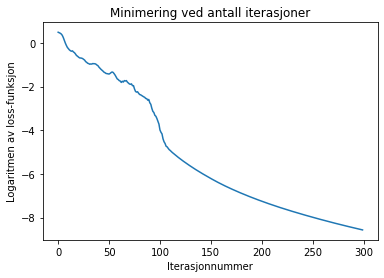

In [ ]:
losses = test_Adam(nn, loss, data['x_train'], data['y_train'], 300, 0.001, m, 6, 13)

Som vi ser går også loss-funksjonen her mot 0, men i en lavere grad enn tidligere. Dette kan indikere at nettverket vårt sliter litt mer med å stadfeste klare mønster og sammenhenger, men verdien er likevel lav nok til at vi burde forvente riktig prediksjon store deler av tiden. 

Vi kan derfor teste med noen enkle tilfeller for å bekrefte at vi får riktig prediksjon.

In [ ]:
x = np.array([[[3, 0, 4, 1, 4, 3, 2]]])
print(x[0,0], "->",(nn.predict(x, 5, 7))[0,0])
x = np.array([[[4, 2, 2, 1, 0, 2, 4]]])
print(x[0,0], "->",(nn.predict(x, 5, 7))[0,0])
x = np.array([[[1, 2, 0, 1, 3, 0, 4]]])
print(x[0,0], "->",(nn.predict(x, 5, 7))[0,0])

[3 0 4 1 4 3 2] -> [0 1 2 3 3 4 4]
[4 2 2 1 0 2 4] -> [0 1 2 2 2 4 4]
[1 2 0 1 3 0 4] -> [0 0 1 1 2 3 4]


Vi ser at nettverket vårt klarer å predikere riktig for disse tilfellene. Likevel kan det være fordelaktig å teste det med et større datasett for å få en dypere forståelse av nettverkets treningsnivå.

get_train_test_sorting-funksjonen leverer ikke bare treningsdata for nettverket vårt, men også testdata som nettverket ikke har blitt eksponert for under treningen. Dette lar oss evaluere hvor godt nettverket vårt kan forutsi sortering av tall, da det blir testet på prediksjonsevnen, ikke bare på gjenkjennelse av treningsdataen.

In [ ]:
#Henter prediksjonsfunksjonen
y_hats = nn.predict(x_test, 5, 7)
#Finner andelen av riktige prediksjoner
tell = countCorrect_sort(y_hats, y_test)

Antall rette prediksjoner: 996
Totalt antall prediksjoner: 1000
Prosentvis riktige predikasjoner: 99.6 %


Også her ser vi at modellen vår er godt trent på å sortere riktig, selv med ny data og flere mulige kombinasjoner.

#### Oppgave 3.4

Nå som vi har demonstrert muligheten til å trene det nevrale nettverket til å sortere tall, ønsker vi å utforske om det kan lære enkel addisjon. Denne tilnærmingen ligner på sorteringen, men her øker vi mengden treningsdata i håp om å oppnå en godt trent modell som kan forutsi riktig resultat store deler av tiden.

Vi starter med å initialisere 3 lag, definere nødvendige variabler og hente ut treningsdata.

In [ ]:
from data_generators import get_train_test_addition
#definerer variabler
r = 4
m = 10
n_max = 3*r

d = 30
k = 20
p = 40
L = 3

#Lager 3 lag til nn
att1 = Attention(d,k)
att2 = Attention(d,k)
att3 = Attention(d,k)

ff1 = FeedForward(d,p)
ff2 = FeedForward(d,p)
ff3 = FeedForward(d,p)

embed = EmbedPosition(n_max,m,d)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

#Lager det nevrale nettverket på nytt
nn = NeuralNetwork([embed, att1, ff1, att2, ff2, att3, ff3, un_embed, softmax])
#implementerer trenignsdata. 2 siffer i tallene vi adderer, 20 batches med 250 samples per batch, og 4 batches vi kan teste med
data = get_train_test_addition(2, samples_per_batch=250,n_batches_train=20, n_batches_test=20)
#Henter ut data
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

Nå kan vi beregne, plotte og skrive ut tapet til objektsfunksjonen ved hver iterasjon ved hjelp av den samme funksjonen som tidligere.

Iterasjon  1  L =  0.04970892901148065 
Iterasjon  2  L =  0.041850564340573375 
Iterasjon  3  L =  0.03498739088913018 
Iterasjon  4  L =  0.029691071925303077 
Iterasjon  5  L =  0.026330458113428896 
Iterasjon  6  L =  0.02325449025957194 
Iterasjon  7  L =  0.019958151416149403 
Iterasjon  8  L =  0.017599261662449565 
Iterasjon  9  L =  0.01679893344022996 
Iterasjon  10  L =  0.01640285150327481 
Iterasjon  11  L =  0.015614390640195711 
Iterasjon  12  L =  0.014381098338374403 
Iterasjon  13  L =  0.018720072573518702 
Iterasjon  14  L =  0.0182093467016048 
Iterasjon  15  L =  0.014203452725830925 
Iterasjon  16  L =  0.011010712719091266 
Iterasjon  17  L =  0.008705712972002764 
Iterasjon  18  L =  0.00801485837952513 
Iterasjon  19  L =  0.007644911017748659 
Iterasjon  20  L =  0.007279979055003769 
Iterasjon  21  L =  0.006153221928776975 
Iterasjon  22  L =  0.005548553490911281 
Iterasjon  23  L =  0.004990096484271985 
Iterasjon  24  L =  0.004638429367313722 
Iterasjon

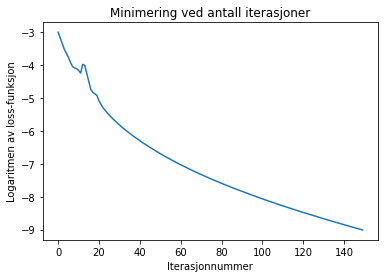

In [ ]:
#Beregner og skriver ut loss for hver itterasjon
losses = test_Adam(nn, loss, data['x_train'], data['y_train'], 150, 0.001, m, 3, 6)

Som vi ser fra figuren, blir tapet i objektsfunksjonen minsket over flere iterasjoner.

Vi kan nå evaluere vårt nevrale nettverk ved å mate det med enkelttilfeller og deretter observere om det faktisk klarer å forutsi riktig addisjon.

In [ ]:
#Gir eksempler på prediksjoner
x = np.array([[[3, 0, 4, 1]]])
print(x[0,0][:2], "+" ,x[0,0][2:], "=",np.flip(nn.predict(x, m, 3))[0,0])
x = np.array([[[4, 2, 9, 1]]])
print(x[0,0][:2], "+" ,x[0,0][2:], "=",np.flip(nn.predict(x, m, 3))[0,0])
x = np.array([[[7, 2, 0, 1]]])
print(x[0,0][:2], "+" ,x[0,0][2:], "=",np.flip(nn.predict(x, m, 3))[0,0])

[3 0] + [4 1] = [0 7 1]
[4 2] + [9 1] = [1 3 3]
[7 2] + [0 1] = [0 7 3]


Vi kan også utføre testing av nettverket vårt på testdataen vi uttrakk samtidig med treningsdataen. I dette tilfellet vil vi gjennomføre 5000 tester på dataene som modellen vår ikke har blitt trent på tidligere.

In [ ]:
#Beregner antall riktige prediksjoner av testdataen opp mot testdataen
y_hats = nn.predict(x_test, 10, 3)
#Teller hvor mange prediksjoner som var riktig
Tell = countCorrect_add(y_hats, y_test)

Antall rette prediksjoner: 4998
Totalt antall prediksjoner: 5000
Prosentvis riktige predikasjoner: 99.96 %


Som vi observerer, vil modellen vår gjøre korrekte addisjonsprediksjoner mesteparten av tiden. For å vurdere nøyaktigheten grundig, kan vi teste hvor mange korrekte prediksjoner den gir for alle de 10 000 mulige tallparene av tosifrede tall.

In [ ]:
#Lager x og y arrays med dimensjon (100, 100, 4) og (100, 100, 3) med alle de mulige tallparene
x_values = np.zeros((100, 100, 4), dtype=int)
y_values = np.zeros((100, 100, 3), dtype=int)

for i in range(100):
    for j in range(100):
        x_values[i, j] = [i // 10, i % 10, j // 10, j % 10]  
        sum_tall = i + j
        if sum_tall < 100: #legger til 0 før summen for å sikre en lengde på 3
            y_values[i, j] = [0, sum_tall // 10, sum_tall % 10]  
        else:
            y_values[i, j] = [sum_tall // 100, sum_tall // 10 % 10, sum_tall % 10] 
#Ser hvor mange riktige av de 10 000 mulige kombinasjonene vi greier å predikere
y_hats = nn.predict(x_values, 10, 3)

Tell = countCorrect_add(y_hats, y_values)


Antall rette prediksjoner: 9998
Totalt antall prediksjoner: 10000
Prosentvis riktige predikasjoner: 99.98 %


Som vi ser greier vi å predikere riktig for opp imot alle mulige kombinasjoner for addisjon mellom to tosifrede tall.